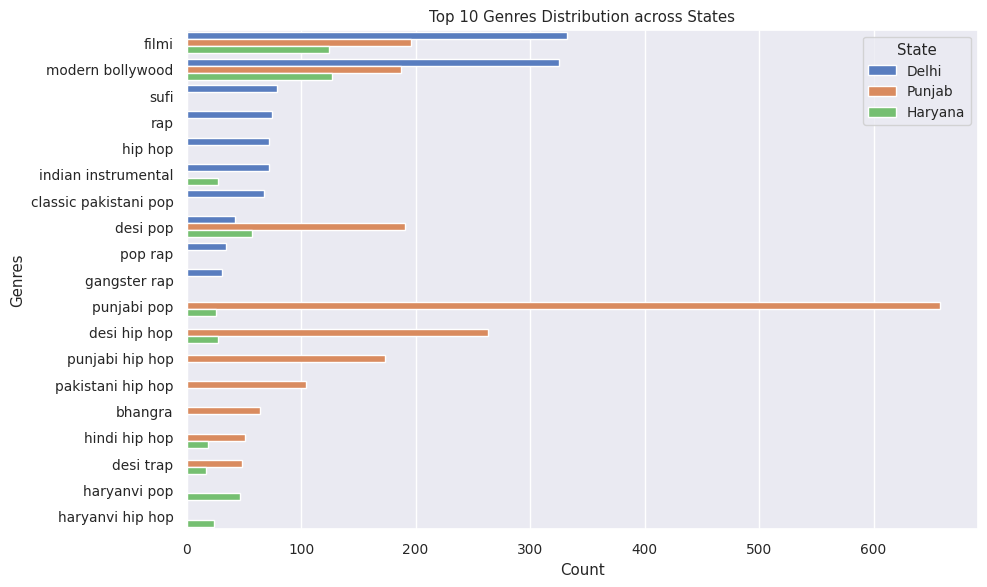

In [56]:
#to show a bar graph about top 10 genres based on popularity in a single graph, among the 3 states

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


delhi_file_path = '/content/cleaned_delhiSS.csv'
punjab_file_path = '/content/cleaned_punjabSS.csv'
haryana_file_path = '/content/cleaned_haryanaSS.csv'

delhi_df = pd.read_csv(delhi_file_path)
punjab_df = pd.read_csv(punjab_file_path)
haryana_df = pd.read_csv(haryana_file_path)


# split the genres and count their occurrences using value_counts()
delhi_genres = delhi_df['Genres'].str.split(',').explode().str.strip()
punjab_genres = punjab_df['Genres'].str.split(',').explode().str.strip()
haryana_genres = haryana_df['Genres'].str.split(',').explode().str.strip()

# Count the occurrences of each genre for each state
delhi_genre_counts = delhi_genres.value_counts()
punjab_genre_counts = punjab_genres.value_counts()
haryana_genre_counts = haryana_genres.value_counts()

top_n = 10
delhi_top_genres = delhi_genre_counts.head(top_n)
punjab_top_genres = punjab_genre_counts.head(top_n)
haryana_top_genres = haryana_genre_counts.head(top_n)

# Creating dataframes for Seaborn plotting
delhi_genre_df = pd.DataFrame({'Genre': delhi_top_genres.index, 'Count': delhi_top_genres.values, 'State': 'Delhi'})
punjab_genre_df = pd.DataFrame({'Genre': punjab_top_genres.index, 'Count': punjab_top_genres.values, 'State': 'Punjab'})
haryana_genre_df = pd.DataFrame({'Genre': haryana_top_genres.index, 'Count': haryana_top_genres.values, 'State': 'Haryana'})

combined_genre_df = pd.concat([delhi_genre_df, punjab_genre_df, haryana_genre_df])

#bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', hue='State', data=combined_genre_df, palette='muted')
plt.title(f'Top {top_n} Genres Distribution across States')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.legend(title='State')

plt.tight_layout()
plt.show()


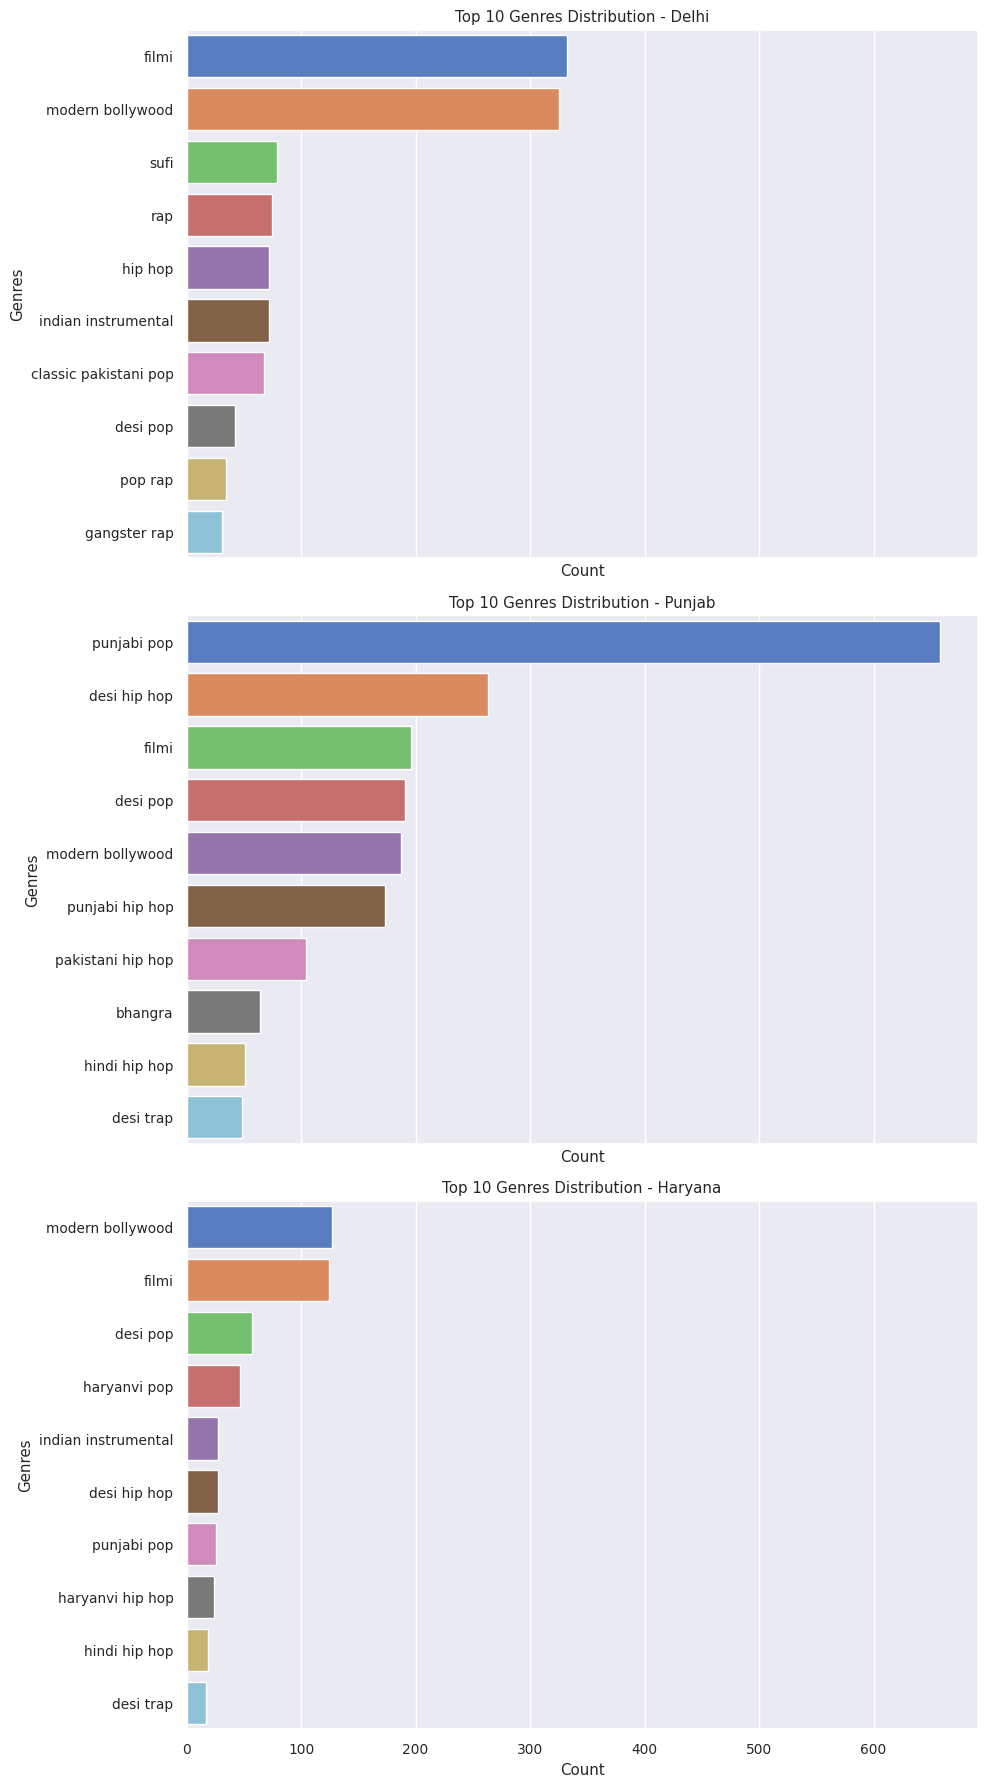

In [59]:
# showing top 10 genres for 3 states

# split the genres and count their occurrences using value_counts()
delhi_genres = delhi_df['Genres'].str.split(',').explode().str.strip()
punjab_genres = punjab_df['Genres'].str.split(',').explode().str.strip()
haryana_genres = haryana_df['Genres'].str.split(',').explode().str.strip()

# Count the occurrences of each genre for each state
delhi_genre_counts = delhi_genres.value_counts()
punjab_genre_counts = punjab_genres.value_counts()
haryana_genre_counts = haryana_genres.value_counts()

top_n = 10
delhi_top_genres = delhi_genre_counts.head(top_n)
punjab_top_genres = punjab_genre_counts.head(top_n)
haryana_top_genres = haryana_genre_counts.head(top_n)

# Creating dataframes for Seaborn plotting
delhi_genre_df = pd.DataFrame({'Genre': delhi_top_genres.index, 'Count': delhi_top_genres.values})
punjab_genre_df = pd.DataFrame({'Genre': punjab_top_genres.index, 'Count': punjab_top_genres.values})
haryana_genre_df = pd.DataFrame({'Genre': haryana_top_genres.index, 'Count': haryana_top_genres.values})

#bar graph
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)
sns.barplot(ax=axes[0], x='Count', y='Genre', data=delhi_genre_df, palette='muted')
axes[0].set_title(f'Top {top_n} Genres Distribution - Delhi')
axes[0].set_ylabel('Genres')

sns.barplot(ax=axes[1], x='Count', y='Genre', data=punjab_genre_df, palette='muted')
axes[1].set_title(f'Top {top_n} Genres Distribution - Punjab')
axes[1].set_ylabel('Genres')

sns.barplot(ax=axes[2], x='Count', y='Genre', data=haryana_genre_df, palette='muted')
axes[2].set_title(f'Top {top_n} Genres Distribution - Haryana')
axes[2].set_ylabel('Genres')

plt.xlabel('Count')
plt.tight_layout()
plt.show()

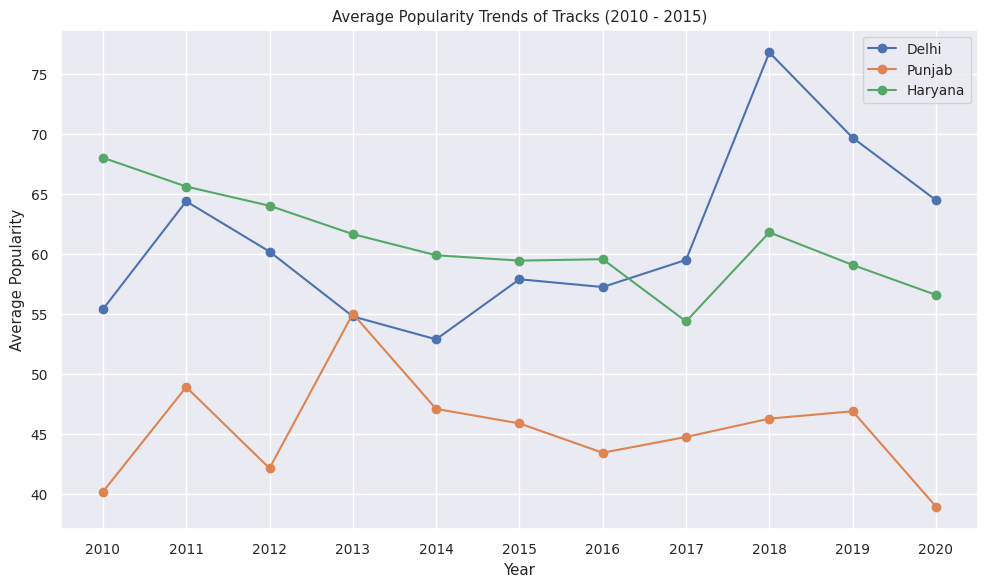

In [60]:
# for showing the popularity trend between the 3 states over last 10 years as whenever a particular track goes viral/popular in those states
# popularity goes up of down in that year and state


delhi_file_path = '/content/cleaned_delhiSS.csv'
punjab_file_path = '/content/cleaned_punjabSS.csv'
haryana_file_path = '/content/cleaned_haryanaSS.csv'

delhi_df = pd.read_csv(delhi_file_path, parse_dates=['Release Date'], infer_datetime_format=True)
punjab_df = pd.read_csv(punjab_file_path, parse_dates=['Release Date'], infer_datetime_format=True)
haryana_df = pd.read_csv(haryana_file_path, parse_dates=['Release Date'], infer_datetime_format=True)

start_date = '2010'
end_date = '2020'

delhi_filtered = delhi_df[(delhi_df['Release Date'].apply(lambda x: str(x)[:4]) >= start_date) & (delhi_df['Release Date'].apply(lambda x: str(x)[:4]) <= end_date)]
punjab_filtered = punjab_df[(punjab_df['Release Date'].apply(lambda x: str(x)[:4]) >= start_date) & (punjab_df['Release Date'].apply(lambda x: str(x)[:4]) <= end_date)]
haryana_filtered = haryana_df[(haryana_df['Release Date'].apply(lambda x: str(x)[:4]) >= start_date) & (haryana_df['Release Date'].apply(lambda x: str(x)[:4]) <= end_date)]

# Check if there's enough data within the specified time range
if not delhi_filtered.empty and not punjab_filtered.empty and not haryana_filtered.empty:
    # Aggregate popularity scores by year (example: yearly averages)
    delhi_yearly_avg = delhi_filtered.groupby(delhi_filtered['Release Date'].apply(lambda x: str(x)[:4]))['Popularity'].mean()
    punjab_yearly_avg = punjab_filtered.groupby(punjab_filtered['Release Date'].apply(lambda x: str(x)[:4]))['Popularity'].mean()
    haryana_yearly_avg = haryana_filtered.groupby(haryana_filtered['Release Date'].apply(lambda x: str(x)[:4]))['Popularity'].mean()

    #line graphs
    plt.figure(figsize=(10, 6))
    plt.plot(delhi_yearly_avg.index, delhi_yearly_avg.values, label='Delhi', marker='o')
    plt.plot(punjab_yearly_avg.index, punjab_yearly_avg.values, label='Punjab', marker='o')
    plt.plot(haryana_yearly_avg.index, haryana_yearly_avg.values, label='Haryana', marker='o')

    plt.title('Average Popularity Trends of Tracks (2010 - 2020)')
    plt.xlabel('Year')
    plt.ylabel('Average Popularity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data within the specified time range.")


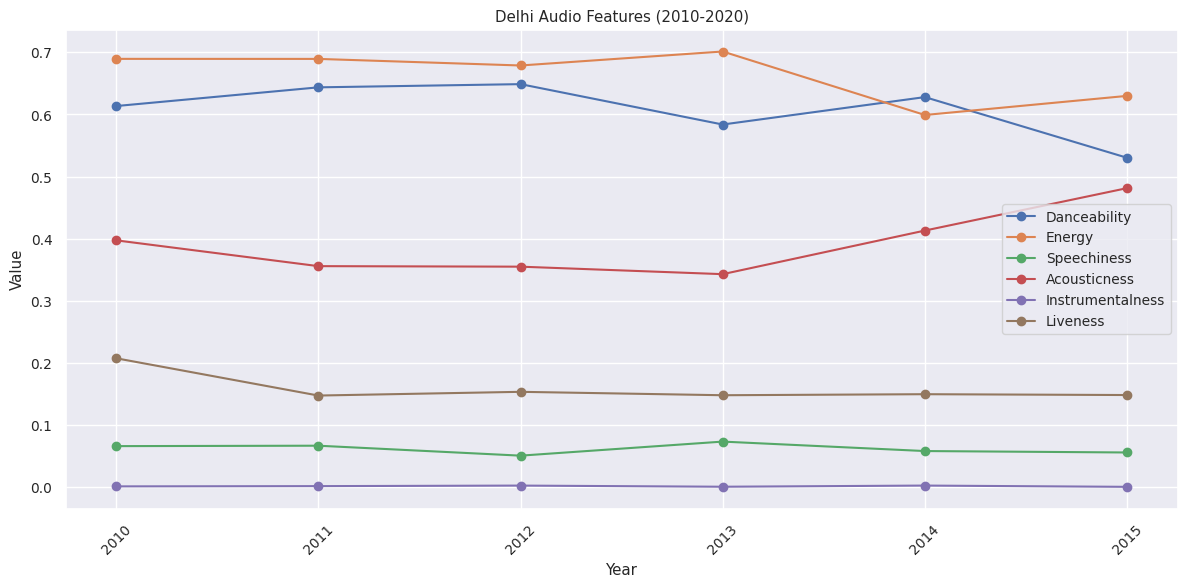

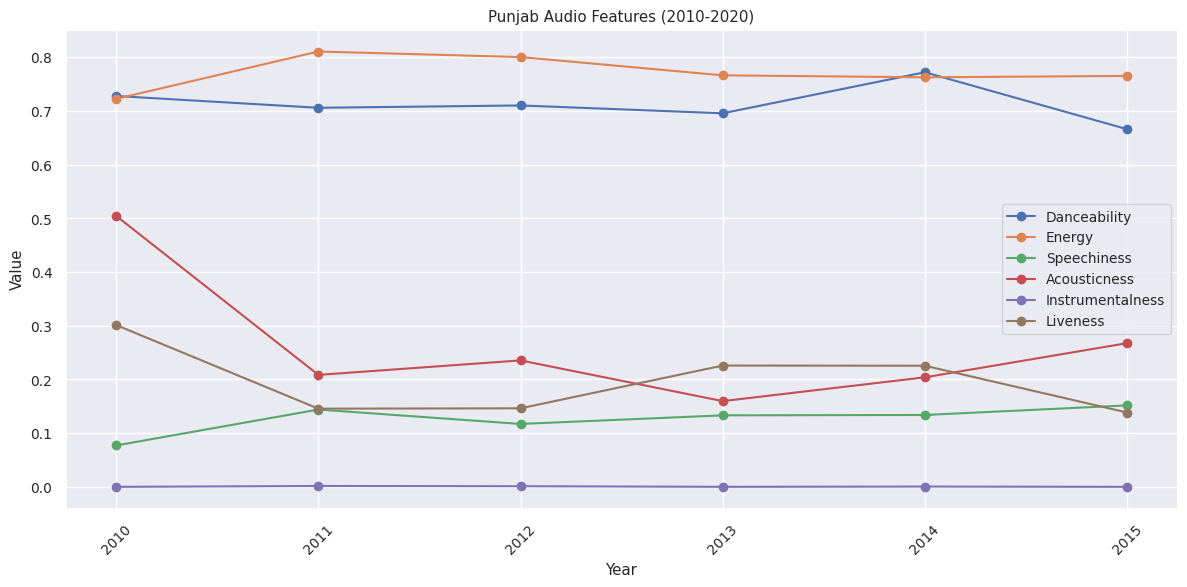

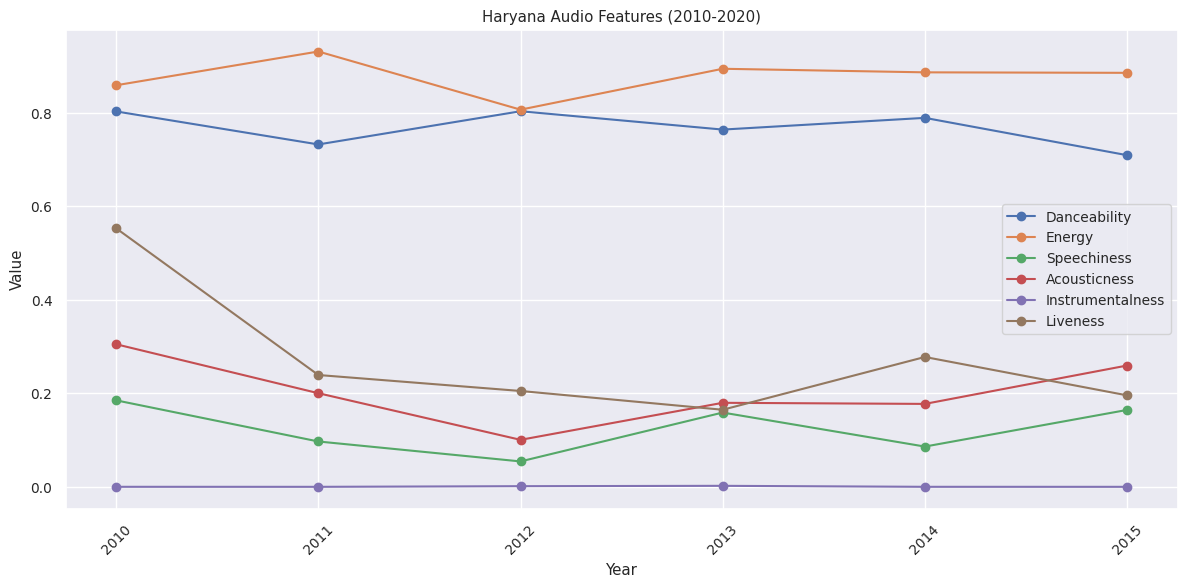

In [62]:
#to show all the audio features and variations between them in all 3 states

import pandas as pd
import matplotlib.pyplot as plt

delhi_df = pd.read_csv('/content/cleaned_delhiSS.csv')
punjab_df = pd.read_csv('/content/cleaned_punjabSS.csv')
haryana_df = pd.read_csv('/content/cleaned_haryanaSS.csv')

start_year = '2010'
end_year = '2015'

delhi_filtered = delhi_df[(delhi_df['Release Date'].astype(str).str[:4] >= start_year) &
                          (delhi_df['Release Date'].astype(str).str[:4] <= end_year)].copy()


punjab_filtered = punjab_df[(punjab_df['Release Date'].astype(str).str[:4] >= start_year) &
                            (punjab_df['Release Date'].astype(str).str[:4] <= end_year)].copy()


haryana_filtered = haryana_df[(haryana_df['Release Date'].astype(str).str[:4] >= start_year) &
                              (haryana_df['Release Date'].astype(str).str[:4] <= end_year)].copy()

# Assign state labels to the filtered DataFrames
delhi_filtered['State'] = 'Delhi'
punjab_filtered['State'] = 'Punjab'
haryana_filtered['State'] = 'Haryana'

combined_df = pd.concat([delhi_filtered, punjab_filtered, haryana_filtered])

# Group data by State and Date, calculate detailed statistics for audio features
audio_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']
grouped = combined_df.groupby(['State', 'Release Date'])[audio_features].mean().reset_index()

#line graph
for state in ['Delhi', 'Punjab', 'Haryana']:
    state_data = grouped[grouped['State'] == state]
    plt.figure(figsize=(12, 6))
    for feature in audio_features:
        plt.plot(state_data['Release Date'], state_data[feature], label=feature, marker='o')
    plt.title(f'{state} Audio Features (2010-2020)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

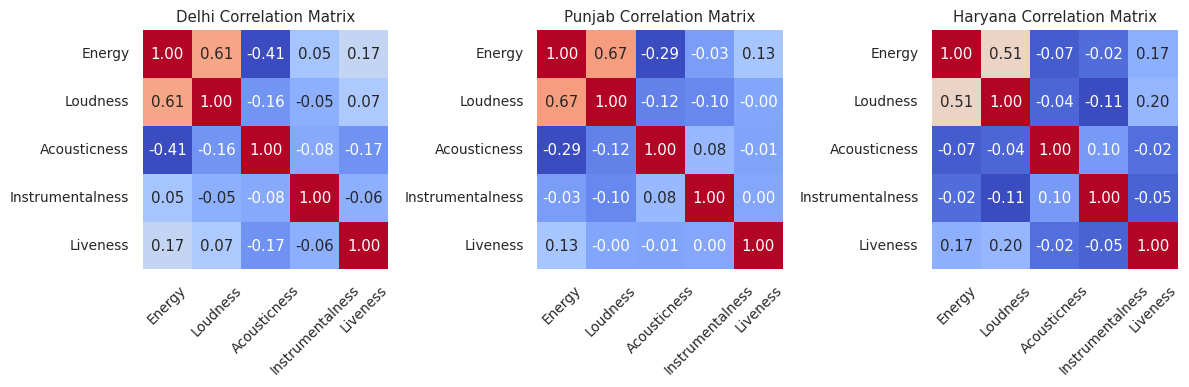

In [51]:
#making correlation matrices represented as heatmaps for all 3 states
#goal is to visually assess and identify any notable patterns/relationships btw these attributes within the music data for states.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


delhi_df = pd.read_csv('/content/cleaned_delhiSS.csv')
punjab_df = pd.read_csv('/content/cleaned_punjabSS.csv')
haryana_df = pd.read_csv('/content/cleaned_haryanaSS.csv')

# Select columns for correlation analysis
selected_columns = ['Energy', 'Loudness', 'Acousticness', 'Instrumentalness', 'Liveness']

# Calculate correlation matrices for each state
delhi_correlation = delhi_df[selected_columns].corr()
punjab_correlation = punjab_df[selected_columns].corr()
haryana_correlation = haryana_df[selected_columns].corr()

# Set up heatmap aesthetics
sns.set(font_scale=0.9)
plt.figure(figsize=(12, 4))

#heatmaps
for i, (title, correlation) in enumerate([('Delhi', delhi_correlation), ('Punjab', punjab_correlation), ('Haryana', haryana_correlation)]):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
    plt.title(f'{title} Correlation Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


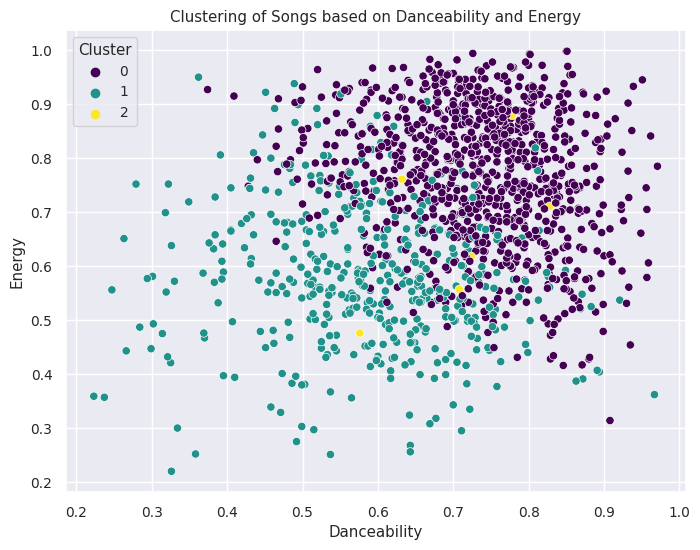

In [50]:
# applying the clustering k mean algorith to
#The clustering process groups similar tracks together based on their audio features
#tracks within the same cluster should exhibit similarities

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


delhi_df = pd.read_csv('/content/cleaned_delhiSS.csv')
punjab_df = pd.read_csv('/content/cleaned_punjabSS.csv')
haryana_df = pd.read_csv('/content/cleaned_haryanaSS.csv')

combined_df = pd.concat([delhi_df, punjab_df, haryana_df])

# Select relevant features for clustering
features = ['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness']

# Handling NaN values by dropping rows with NaN values in selected columns
combined_df.dropna(subset=features, inplace=True)

# Scale the selected features
scaler = StandardScaler()
X = scaler.fit_transform(combined_df[features])

#K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Danceability', y='Energy', hue='Cluster', palette='viridis', legend='full')
plt.title('Clustering of Songs based on Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()
